# Required Libraries

In [1]:
# Basic libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# System utilities
import os 
import pickle
import gzip

import math # Mathematical operations

# Machine Learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Model training and evaluation utilities
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Suppress warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

# Set seed for reproducibility
SEED = 21

# Data Extraction

In [2]:
# Path to the main directory containing all folders
main_directory = "iomt_cyberattack_dataset"

# Get a list of all directories inside the main directory
folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]
print(folders, '\n')

# Dictionary to store dataframes for each folder
folders_dfs = {}

# Loop through each folder
for folder_name in folders:
    folder_path = os.path.join(main_directory, folder_name)
    folder_files = os.listdir(folder_path)
    
    # Read all CSV files in the current folder and concatenate them into a single dataframe
    folder_df = pd.concat(
        [pd.read_csv(os.path.join(folder_path, file_name)) for file_name in folder_files],
        ignore_index=True
    )
    
    # Add a column with the folder name as the label
    folder_df['Label'] = folder_name
    
    # Store the concatenated dataframe in the dictionary
    folders_dfs[folder_name] = folder_df
    
    print(f"{folder_name} files: {folder_files}")

['ARP Spoofing', 'Benign', 'DDoS', 'DoS', 'MQTT Attack', 'Recon'] 

ARP Spoofing files: ['ARP_Spoofing_test.pcap.csv', 'ARP_Spoofing_train.pcap.csv']
Benign files: ['Benign_test.pcap.csv', 'Benign_train.pcap.csv']
DDoS files: ['TCP_IP-DDoS-TCP1_train.pcap.csv', 'TCP_IP-DDoS-TCP_test.pcap.csv']
DoS files: ['TCP_IP-DoS-TCP1_train.pcap.csv', 'TCP_IP-DoS-TCP_test.pcap.csv']
MQTT Attack files: ['MQTT-DDoS-Connect_Flood_test.pcap.csv', 'MQTT-DDoS-Connect_Flood_train.pcap.csv']
Recon files: ['Recon-OS_Scan_test.pcap.csv', 'Recon-OS_Scan_train.pcap.csv', 'Recon-Ping_Sweep_test.pcap.csv', 'Recon-Ping_Sweep_train.pcap.csv', 'Recon-Port_Scan_test.pcap.csv', 'Recon-Port_Scan_train.pcap.csv', 'Recon-VulScan_test.pcap.csv', 'Recon-VulScan_train.pcap.csv']


In [3]:
# Combine all dataframes into a single dataframe
iomt_dataset = pd.concat(folders_dfs.values(), ignore_index=True)

print(iomt_dataset['Label'].value_counts())

DDoS            384909
Benign          230339
MQTT Attack     214952
DoS             177503
Recon           131402
ARP Spoofing     17791
Name: Label, dtype: int64


In [4]:
# Show first five rows
iomt_dataset.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Label
0,3609.0,17.0,64.0,212.961498,212.961498,0.0,0.0,0.0,0.0,0.0,...,487.409300,673.2,1.694027e+08,5.5,34.695355,689.300842,279086.099527,0.9,38.5,ARP Spoofing
1,9531.4,17.0,64.0,442.954430,442.954430,0.0,0.0,0.0,0.0,0.0,...,511.518567,500.4,1.694027e+08,13.5,35.198404,725.048676,264633.896422,1.0,244.6,ARP Spoofing
2,6372.4,11.5,64.0,28457.581790,28457.581790,0.0,0.0,0.0,0.0,0.3,...,176.007057,201.5,8.456492e-03,5.5,23.432541,248.911567,34444.026196,0.9,38.5,ARP Spoofing
3,129.2,6.0,64.0,105851.136945,105851.136945,0.0,0.0,0.0,0.0,0.5,...,161.986428,81.3,1.694027e+08,13.5,17.959288,229.542470,26471.574324,1.0,244.6,ARP Spoofing
4,12130.7,14.8,81.4,4896.846315,4896.846315,0.0,0.0,0.0,0.0,0.1,...,159.594551,325.9,1.157858e-02,5.5,23.749589,225.700779,28511.557770,0.9,38.5,ARP Spoofing


In [5]:
# Summary of dataset columns
iomt_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156896 entries, 0 to 1156895
Data columns (total 46 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Header_Length    1156896 non-null  float64
 1   Protocol Type    1156896 non-null  float64
 2   Duration         1156896 non-null  float64
 3   Rate             1156896 non-null  float64
 4   Srate            1156896 non-null  float64
 5   Drate            1156896 non-null  float64
 6   fin_flag_number  1156896 non-null  float64
 7   syn_flag_number  1156896 non-null  float64
 8   rst_flag_number  1156896 non-null  float64
 9   psh_flag_number  1156896 non-null  float64
 10  ack_flag_number  1156896 non-null  float64
 11  ece_flag_number  1156896 non-null  float64
 12  cwr_flag_number  1156896 non-null  float64
 13  ack_count        1156896 non-null  float64
 14  syn_count        1156896 non-null  float64
 15  fin_count        1156896 non-null  float64
 16  rst_count        1

# Data Cleaning

In [6]:
# Get shape of dataset before cleaning
iomt_dataset.shape

(1156896, 46)

In [7]:
# Dataset columns
iomt_dataset.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight', 'Label'],
      dtype='object')

In [8]:
# Check for null values in the entire dataset
null_values = iomt_dataset.isnull().sum()

if null_values.any():
    print("Dataset contains null values.")
    # Display columns with null values and their counts
    print(null_values[null_values > 0])
            
else:
    print("Dataset does not contain null values.")

Dataset does not contain null values.


In [9]:
# Extract only numeric columns
numeric_columns = iomt_dataset.select_dtypes(include=np.number).columns

# Check for infinity values in the numeric columns
if np.any(np.isinf(iomt_dataset[numeric_columns])):
    print("Dataset contains infinity values.")

    # Identify columns with infinity values
    for col in numeric_columns:
        inf_count = np.sum(np.isinf(iomt_dataset[col]))
        if inf_count:
            print(col, inf_count)

else:
    print("Dataset does not contain infinity values.")

Dataset does not contain infinity values.


In [10]:
# Check for single-valued columns
single_valued_columns = [col for col in iomt_dataset.columns if iomt_dataset[col].nunique() == 1]

# Display single-valued columns
print('Single-valued columns:', single_valued_columns)

# Remove single-valued column
iomt_dataset.drop(columns=single_valued_columns, inplace=True)

Single-valued columns: ['Drate']


In [11]:
# Floor the values of the 'Protocol Type' column and convert to integers
iomt_dataset['Protocol Type'] = iomt_dataset['Protocol Type'].apply(math.floor).astype(int)

In [12]:
# Check if 'Srate' and 'Rate' columns have the same values
if (iomt_dataset['Srate'] == iomt_dataset['Rate']).all():
    print("Srate and Rate columns have the same values.")
else:
    print("Srate and Rate columns do not have the same values.")
    
# Drop the 'Srate' column
iomt_dataset.drop(columns=['Srate'], inplace=True)

Srate and Rate columns have the same values.


# Exploratory Data Analysis

In [13]:
# Get number of rows and columns
iomt_dataset.shape

(1156896, 44)

## Overview of Columns

In [14]:
# Show the names and datatypes of columns
iomt_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156896 entries, 0 to 1156895
Data columns (total 44 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Header_Length    1156896 non-null  float64
 1   Protocol Type    1156896 non-null  int32  
 2   Duration         1156896 non-null  float64
 3   Rate             1156896 non-null  float64
 4   fin_flag_number  1156896 non-null  float64
 5   syn_flag_number  1156896 non-null  float64
 6   rst_flag_number  1156896 non-null  float64
 7   psh_flag_number  1156896 non-null  float64
 8   ack_flag_number  1156896 non-null  float64
 9   ece_flag_number  1156896 non-null  float64
 10  cwr_flag_number  1156896 non-null  float64
 11  ack_count        1156896 non-null  float64
 12  syn_count        1156896 non-null  float64
 13  fin_count        1156896 non-null  float64
 14  rst_count        1156896 non-null  float64
 15  HTTP             1156896 non-null  float64
 16  HTTPS            1

In [15]:
# Shows the percentiles of numerical data (datatype - float & int)
iomt_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Header_Length,1156896.0,1.401577e+05,7.032988e+05,0.000000,5.400000e+01,1.080000e+02,7.741050e+02,9.896704e+06
Protocol Type,1156896.0,6.273031e+00,1.544033e+00,0.000000,6.000000e+00,6.000000e+00,6.000000e+00,1.700000e+01
Duration,1156896.0,6.565963e+01,1.818157e+01,0.000000,6.400000e+01,6.400000e+01,6.400000e+01,2.550000e+02
Rate,1156896.0,4.949825e+03,2.861498e+04,0.000000,1.974932e+00,9.757072e+00,7.040731e+01,2.097152e+06
fin_flag_number,1156896.0,3.727279e-02,8.644429e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
syn_flag_number,1156896.0,8.895414e-02,2.221539e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00
rst_flag_number,1156896.0,8.545029e-02,2.232499e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
psh_flag_number,1156896.0,1.243118e-01,1.909006e-01,0.000000,0.000000e+00,0.000000e+00,2.100000e-01,1.000000e+00
ack_flag_number,1156896.0,3.764641e-01,4.333326e-01,0.000000,0.000000e+00,0.000000e+00,8.800000e-01,1.000000e+00
ece_flag_number,1156896.0,1.871387e-05,1.370605e-03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01


In [16]:
# Show the number of unique values for each column
for col in iomt_dataset.columns:
        print(col, iomt_dataset[col].nunique())

Header_Length 339222
Protocol Type 17
Duration 2534
Rate 734997
fin_flag_number 216
syn_flag_number 216
rst_flag_number 200
psh_flag_number 217
ack_flag_number 240
ece_flag_number 5
cwr_flag_number 5
ack_count 481
syn_count 573
fin_count 390
rst_count 63885
HTTP 25
HTTPS 108
DNS 24
Telnet 5
SMTP 5
SSH 14
IRC 5
TCP 73
UDP 71
DHCP 5
ARP 41
ICMP 19
IGMP 12
IPv 41
LLC 41
Tot sum 59371
Min 6590
Max 16921
AVG 390916
Std 394221
Tot size 13277
IAT 1037583
Number 97
Magnitue 384869
Radius 388599
Covariance 389179
Variance 227
Weight 103
Label 6


In [17]:
# Labels
iomt_dataset['Label'].value_counts()

DDoS            384909
Benign          230339
MQTT Attack     214952
DoS             177503
Recon           131402
ARP Spoofing     17791
Name: Label, dtype: int64

In [18]:
target_list = ['Benign', 'ARP Spoofing', 'DDoS', 'DoS', 'MQTT Attack', 'Recon']

## Data Visualization

6     1045899
7       46612
17      16892
8       16836
5        6261
9        4712
4        3988
15       3168
3        2101
10       2069
14       1590
11       1353
12       1183
2        1172
13       1157
0        1091
1         812
Name: Protocol Type, dtype: int64


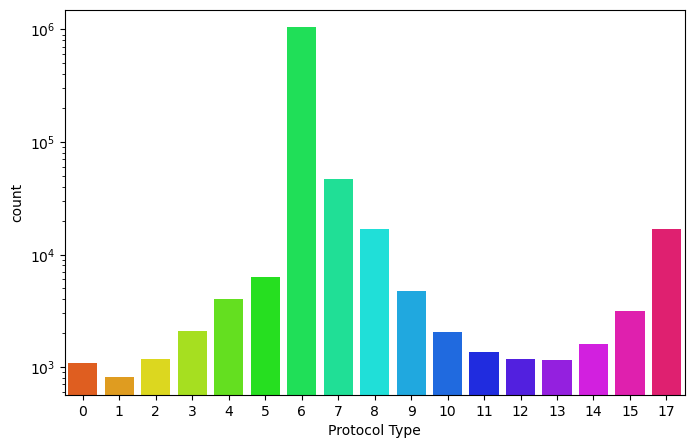

In [19]:
# Display the count of each protocol type
print(iomt_dataset['Protocol Type'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(data=iomt_dataset, x='Protocol Type', palette='hsv')
plt.yscale('log')

Label
DDoS            2.456464e+02
MQTT Attack     5.029301e+02
DoS             3.096403e+03
Recon           6.085581e+04
Benign          4.762732e+05
ARP Spoofing    2.456003e+06
Name: Header_Length, dtype: float64


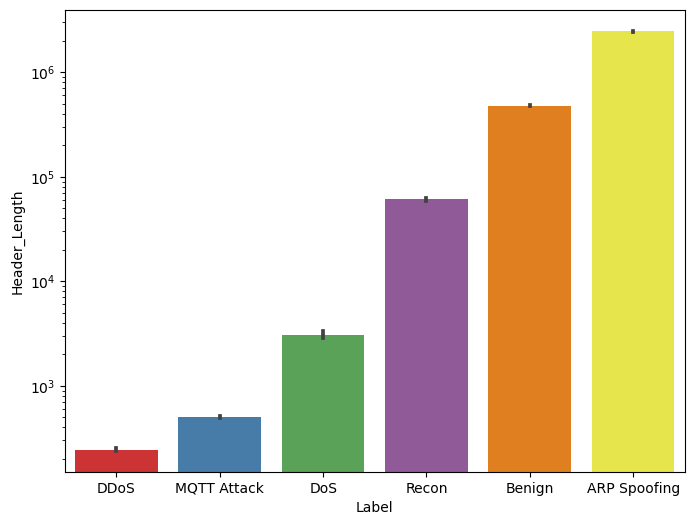

In [20]:
# Show average header length for each label catgory
average_header_length = iomt_dataset.groupby('Label')['Header_Length'].mean().sort_values()
print(average_header_length)

plt.figure(figsize=(8,6))
sns.barplot(data=iomt_dataset, x='Label', y='Header_Length', 
            order=average_header_length.index,  palette='Set1')
plt.yscale('log')

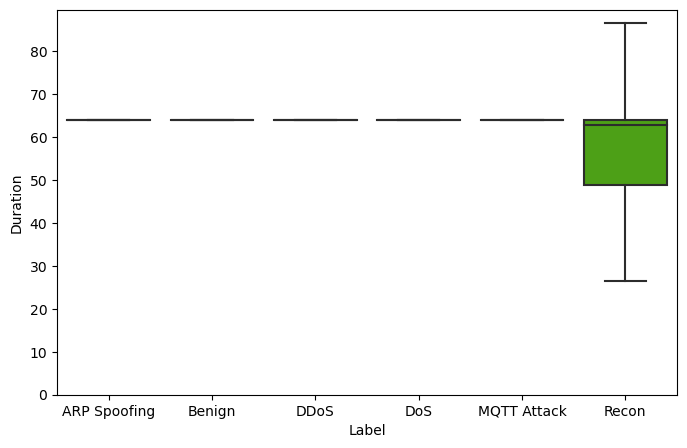

In [21]:
# Plot the distribution of network traffic duration across different labels
plt.figure(figsize=(8,5))
sns.boxplot(data=iomt_dataset, x='Label', y='Duration', sym="", palette='brg')

# Ensure the y-axis starts at 0
plt.ylim(bottom=0)

plt.show()

Label
Recon            155.700559
Benign           312.357312
ARP Spoofing     375.037044
DoS             6408.564734
MQTT Attack     6927.473634
DDoS            7795.969914
Name: Rate, dtype: float64


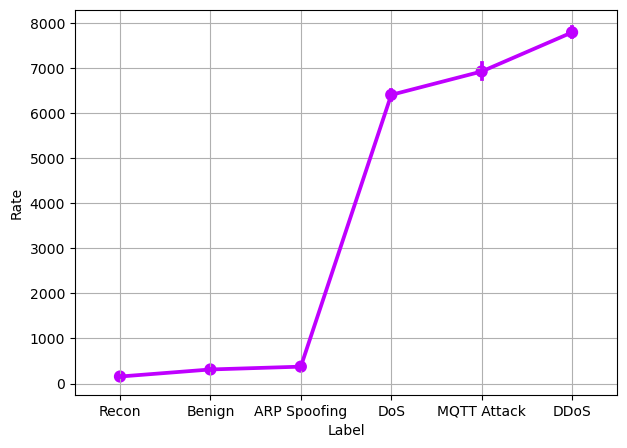

In [22]:
# Display the mean flow rate for each label, sorted in ascending order.
# The lines in the plot represent the 95% confidence intervals for these mean values.

label_flw_rate = iomt_dataset.groupby('Label')['Rate'].mean().sort_values()
print(label_flw_rate)

plt.figure(figsize=(7,5))
sns.pointplot(data=iomt_dataset, x='Label', y='Rate', order=label_flw_rate.index, color='#BF00FF')

plt.grid()
plt.show()

Label
DDoS             1
DoS              2
ARP Spoofing     3
MQTT Attack      5
Recon            8
Benign          11
Name: syn_count, dtype: int64


<Axes: xlabel='Label', ylabel='syn_count'>

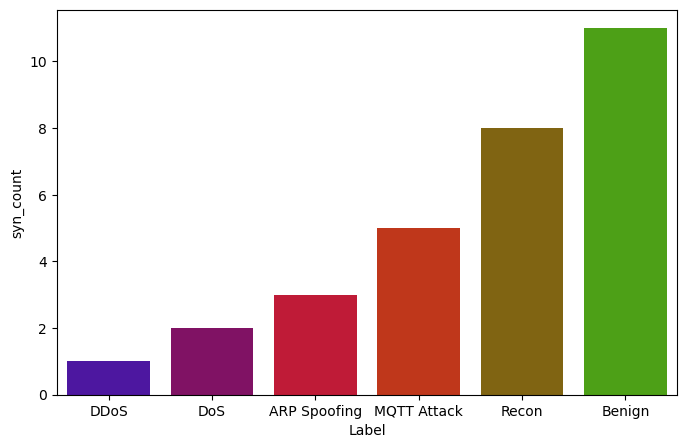

In [23]:
# Calculate and round up the maximum SYN flag count for each label
max_syn_count_values = iomt_dataset.groupby('Label')['syn_count'].max().apply(math.ceil).sort_values()
print(max_syn_count_values)

plt.figure(figsize=(8,5))
sns.barplot(x=max_syn_count_values.index, y=max_syn_count_values, palette='brg')

Label
DDoS             1
DoS              1
ARP Spoofing     2
MQTT Attack      4
Recon            7
Benign          12
Name: ack_count, dtype: int64


<Axes: xlabel='Label', ylabel='ack_count'>

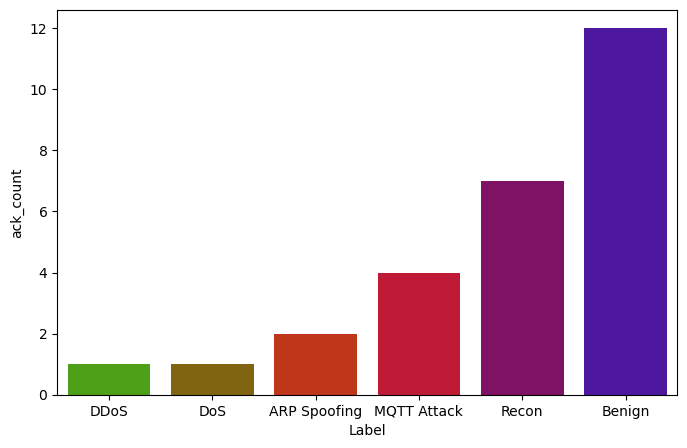

In [24]:
# Calculate and round up the maximum value of ack flag count for each label
max_ack_count_values = iomt_dataset.groupby('Label')['ack_count'].max().apply(math.ceil).sort_values()
print(max_ack_count_values)

plt.figure(figsize=(8,5))
sns.barplot(x=max_ack_count_values.index, y=max_ack_count_values, palette='brg_r')

Label
DDoS             55.357696
DoS              57.200698
MQTT Attack      68.015716
Recon            76.564114
Benign          196.573605
ARP Spoofing    478.126490
Name: Tot size, dtype: float64


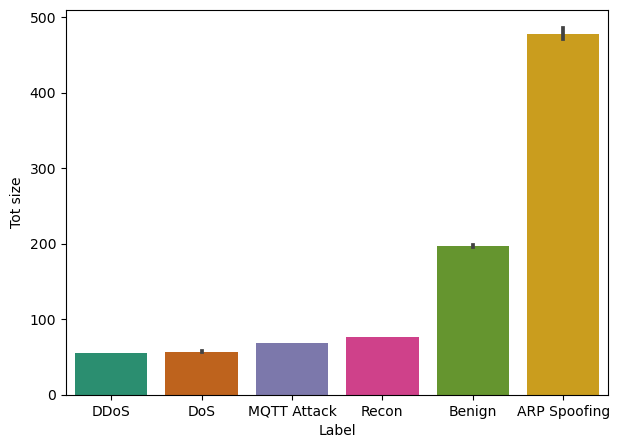

In [25]:
# Display the average total size of packets for each label
# Error bars represent the 95% confidence interval

label_pkt_size = iomt_dataset.groupby('Label')['Tot size'].mean().sort_values()
print(label_pkt_size)

plt.figure(figsize=(7,5))
sns.barplot(data=iomt_dataset, x='Label', y='Tot size', order=label_pkt_size.index, palette='Dark2')
plt.show()

# Feature Engineering

### Data Transformation for Multi-class Classification:
- Benign = 0
- ARP Spoofing = 1
- DDoS = 2
- DoS = 3
- MQTT Attack = 4
- Recon = 5

In [26]:
# Define a mapping dictionary for labels to unique numbers
label_mapping = {
    'Benign': 0,
    'ARP Spoofing': 1,
    'DDoS': 2,
    'DoS': 3,
    'MQTT Attack': 4,
    'Recon': 5
}

# Create a new column 'Target' based on 'Label' using the mapping dictionary
iomt_dataset['Target'] = iomt_dataset['Label'].map(label_mapping).astype(int)

# Display the count of each unique 'Target' value
print(iomt_dataset['Target'].value_counts())

2    384909
0    230339
4    214952
3    177503
5    131402
1     17791
Name: Target, dtype: int64


DDoS            384909
Benign          230339
MQTT Attack     214952
DoS             177503
Recon           131402
ARP Spoofing     17791
Name: Label, dtype: int64


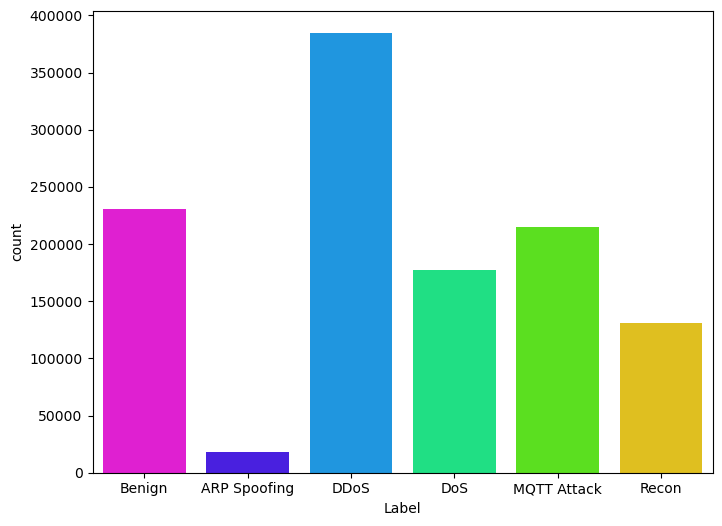

In [27]:
# Show Multi-class Classification Labels
print(iomt_dataset['Label'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=iomt_dataset, x='Label', order=target_list, palette='hsv_r')
plt.show()

### Separation of Features and Labels

In [28]:
# Drop target columns to get only features
numeric_features = list(iomt_dataset.columns.drop(['Label', 'Target']))

# Features
features = iomt_dataset[numeric_features]
print(features.info(), '\n')

X = features.values
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156896 entries, 0 to 1156895
Data columns (total 43 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Header_Length    1156896 non-null  float64
 1   Protocol Type    1156896 non-null  int32  
 2   Duration         1156896 non-null  float64
 3   Rate             1156896 non-null  float64
 4   fin_flag_number  1156896 non-null  float64
 5   syn_flag_number  1156896 non-null  float64
 6   rst_flag_number  1156896 non-null  float64
 7   psh_flag_number  1156896 non-null  float64
 8   ack_flag_number  1156896 non-null  float64
 9   ece_flag_number  1156896 non-null  float64
 10  cwr_flag_number  1156896 non-null  float64
 11  ack_count        1156896 non-null  float64
 12  syn_count        1156896 non-null  float64
 13  fin_count        1156896 non-null  float64
 14  rst_count        1156896 non-null  float64
 15  HTTP             1156896 non-null  float64
 16  HTTPS            1

In [29]:
# Target variable
y = iomt_dataset['Target'].values
print(y.shape)

(1156896,)


# Model Training and Evaluation

In [30]:
# Instantiate models
models = [RandomForestClassifier(random_state=SEED),
          
          DecisionTreeClassifier(random_state=SEED),
          
          KNeighborsClassifier(),
          
          LogisticRegression(random_state=SEED, max_iter=300),
          
          LinearSVC(random_state=SEED)]

## Multi-class Classification

In [31]:
# Split data into 70% training set and 30% test set
# X: features; y: target

multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

RandomForestClassifier
Accuracy: 0.995 

              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99     69467
ARP Spoofing       0.95      0.87      0.90      5225
        DDoS       1.00      1.00      1.00    115797
         DoS       1.00      1.00      1.00     52900
 MQTT Attack       1.00      1.00      1.00     64192
       Recon       0.99      0.98      0.99     39488

    accuracy                           1.00    347069
   macro avg       0.99      0.97      0.98    347069
weighted avg       0.99      1.00      0.99    347069

[[ 69276     90      0      0      0    101]
 [   589   4522      0      0      0    114]
 [     0      0 115791      3      2      1]
 [     0      2      3  52895      0      0]
 [     1      0      0      0  64191      0]
 [   665    160      0      0      0  38663]]


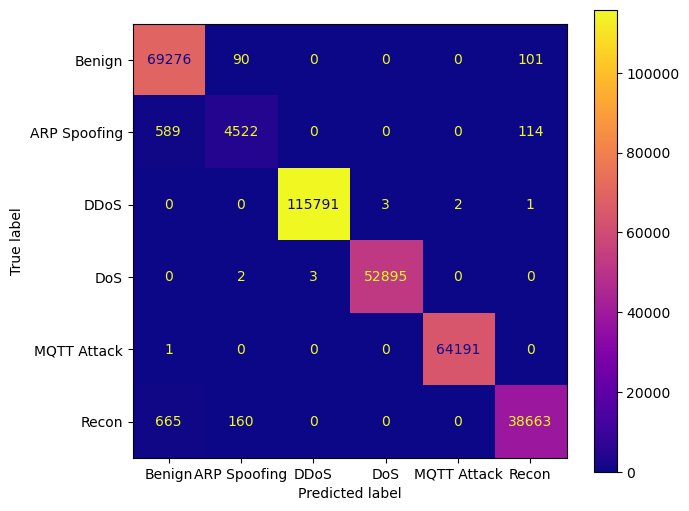

DecisionTreeClassifier
Accuracy: 0.993 

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99     69467
ARP Spoofing       0.87      0.87      0.87      5225
        DDoS       1.00      1.00      1.00    115797
         DoS       1.00      1.00      1.00     52900
 MQTT Attack       1.00      1.00      1.00     64192
       Recon       0.98      0.98      0.98     39488

    accuracy                           0.99    347069
   macro avg       0.97      0.97      0.97    347069
weighted avg       0.99      0.99      0.99    347069

[[ 68427    473      0      3      1    563]
 [   458   4569      0      1      0    197]
 [     0      0 115794      2      0      1]
 [     2      2      2  52893      1      0]
 [     6      0      2      4  64176      4]
 [   536    224      0      1      6  38721]]


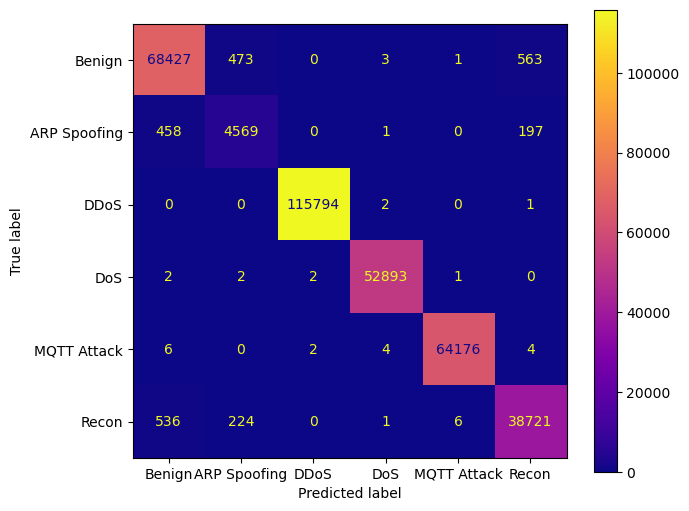

KNeighborsClassifier
Accuracy: 0.983 

              precision    recall  f1-score   support

      Benign       0.95      0.98      0.97     69467
ARP Spoofing       0.74      0.61      0.67      5225
        DDoS       1.00      1.00      1.00    115797
         DoS       1.00      1.00      1.00     52900
 MQTT Attack       1.00      1.00      1.00     64192
       Recon       0.97      0.93      0.95     39488

    accuracy                           0.98    347069
   macro avg       0.94      0.92      0.93    347069
weighted avg       0.98      0.98      0.98    347069

[[ 68256    604      1      0      0    606]
 [  1483   3203      0      0      0    539]
 [     0      0 115774     11      8      4]
 [     1      0     16  52843     36      4]
 [     3      0     11     52  64123      3]
 [  2137    503      0      1      0  36847]]


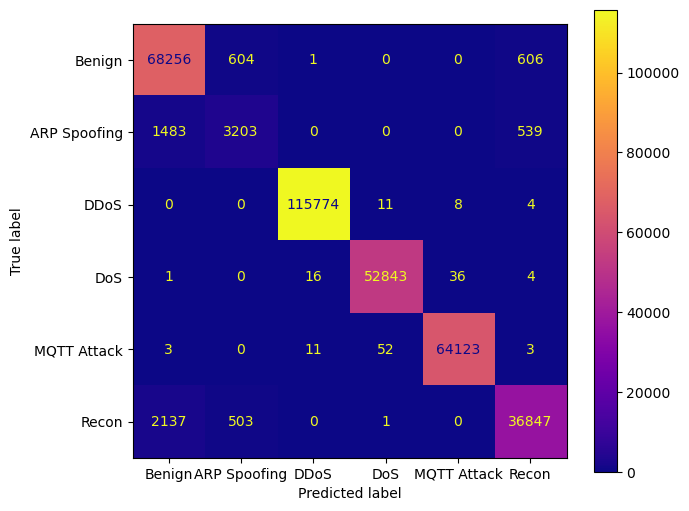

LogisticRegression
Accuracy: 0.455 

              precision    recall  f1-score   support

      Benign       0.65      0.59      0.62     69467
ARP Spoofing       0.05      0.25      0.08      5225
        DDoS       0.45      1.00      0.62    115797
         DoS       0.00      0.00      0.00     52900
 MQTT Attack       0.00      0.00      0.00     64192
       Recon       0.00      0.00      0.00     39488

    accuracy                           0.46    347069
   macro avg       0.19      0.31      0.22    347069
weighted avg       0.28      0.46      0.33    347069

[[ 41276  23602   4589      0      0      0]
 [  3358   1317    550      0      0      0]
 [   401     11 115385      0      0      0]
 [   583      0  52317      0      0      0]
 [   167      0  64025      0      0      0]
 [ 17537   4311  17640      0      0      0]]


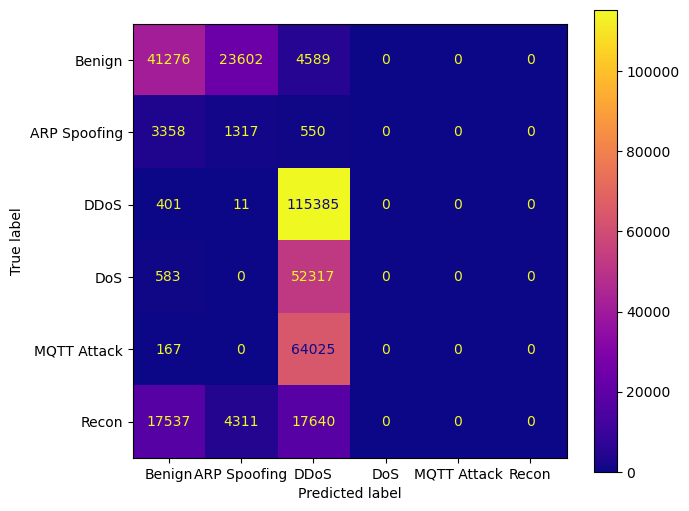

LinearSVC
Accuracy: 0.408 

              precision    recall  f1-score   support

      Benign       0.62      0.76      0.68     69467
ARP Spoofing       0.03      0.01      0.02      5225
        DDoS       0.83      0.05      0.10    115797
         DoS       0.24      0.86      0.38     52900
 MQTT Attack       0.90      0.24      0.38     64192
       Recon       0.44      0.55      0.49     39488

    accuracy                           0.41    347069
   macro avg       0.51      0.41      0.34    347069
weighted avg       0.66      0.41      0.35    347069

[[52464  1959     0  1005  1248 12791]
 [  935    73     0   222    63  3932]
 [16006    11  6104 91774   207  1695]
 [ 5192    21  1228 45598   175   686]
 [ 7764     6     0 32935 15657  7830]
 [ 1820    48     4 15894   134 21588]]


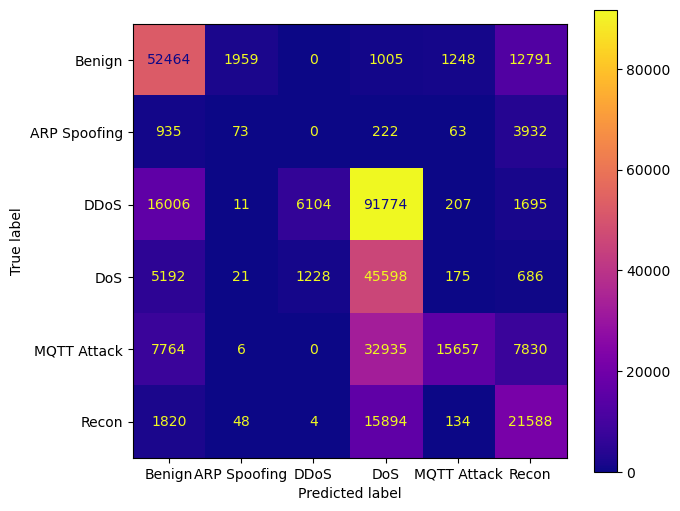

In [32]:
# Lists for evaluation metrics
multi_model = []
multi_accuracy = []

for model in models:
    model_name = model.__class__.__name__
    multi_model.append(model_name)

    model.fit(multi_X_train, multi_y_train)                 # train the model on the training data
    model_pred = model.predict(multi_X_test)                # predict labels

    # Calculate accuracy
    accuracy = round(metrics.accuracy_score(multi_y_test, model_pred), 3)
    multi_accuracy.append(accuracy)

    print(model_name)
    
    print(f'Accuracy: {accuracy}', '\n')

    print(classification_report(multi_y_test, model_pred, target_names=target_list))
    
    cm = confusion_matrix(multi_y_test, model_pred)
    print(cm)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_list)    
    fig, ax = plt.subplots(figsize=(7, 6))
    cm_display.plot(ax=ax,  cmap='plasma')
    plt.show()

    print("==" * 60)

### Compilation of Multi-class Classification Results

In [33]:
# Create a DataFrame from lists
multi_all_results = pd.DataFrame({"Model": multi_model, "Accuracy": multi_accuracy})

print(multi_all_results)

                    Model  Accuracy
0  RandomForestClassifier     0.995
1  DecisionTreeClassifier     0.993
2    KNeighborsClassifier     0.983
3      LogisticRegression     0.455
4               LinearSVC     0.408


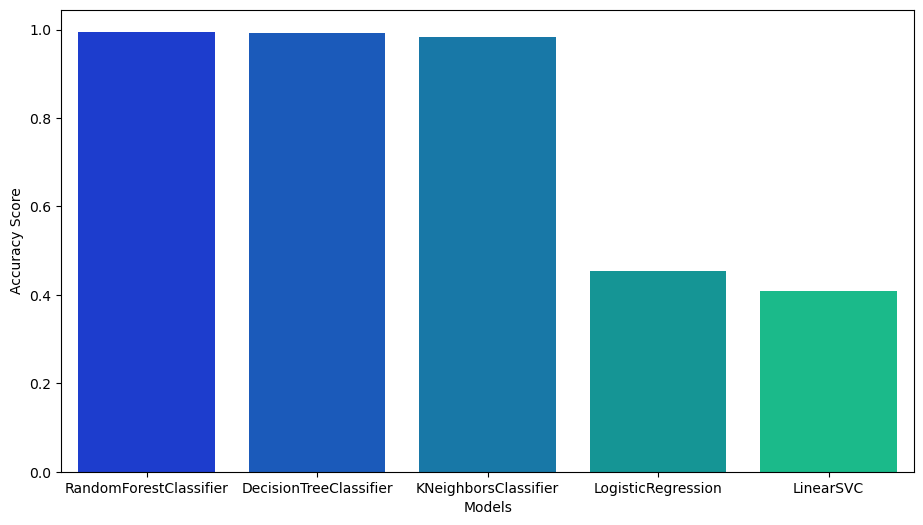

In [34]:
# Multi-class classification accuracy
plt.figure(figsize=(11, 6))
sns.barplot(x=multi_model, y=multi_accuracy, palette='winter')

plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.show()

# Save the Best Model for Deployment

            Feature  Importance
36              IAT    0.225187
14        rst_count    0.073036
0     Header_Length    0.068112
13        fin_count    0.063719
33              AVG    0.059033
35         Tot size    0.051942
3              Rate    0.050702
11        ack_count    0.044981
38         Magnitue    0.043021
8   ack_flag_number    0.038919
32              Max    0.031102
4   fin_flag_number    0.029908
5   syn_flag_number    0.029603
6   rst_flag_number    0.021249
7   psh_flag_number    0.020832


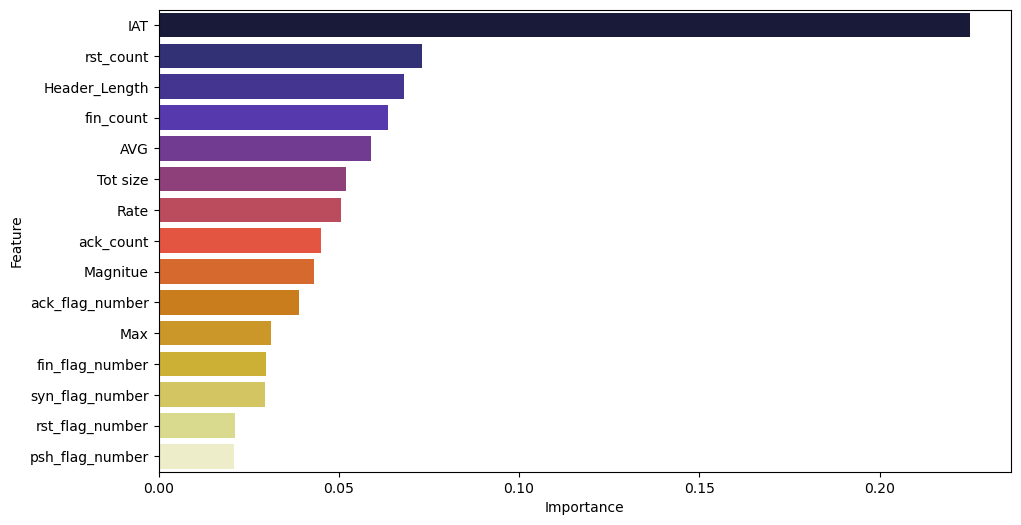

In [35]:
# Instantiate the optimal model
rf = RandomForestClassifier(random_state=SEED)

# Fit model to the training set
rf.fit(multi_X_train, multi_y_train)

### Get Feature Importances
importances = rf.feature_importances_  # Get feature importances
feature_names = features.columns           # List of feature names

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_15_importance_df = importance_df[:15]

# Print the top 15 features
print(top_15_importance_df)

# Plot the feature importances
plt.figure(figsize=(11, 6))
sns.barplot(x='Importance', y='Feature', data=top_15_importance_df, palette='CMRmap')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [36]:
# New set of features
new_features = iomt_dataset[list(top_15_importance_df.Feature)]
print(new_features.info(), '\n')

new_X = new_features.values
print(new_X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156896 entries, 0 to 1156895
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   IAT              1156896 non-null  float64
 1   rst_count        1156896 non-null  float64
 2   Header_Length    1156896 non-null  float64
 3   fin_count        1156896 non-null  float64
 4   AVG              1156896 non-null  float64
 5   Tot size         1156896 non-null  float64
 6   Rate             1156896 non-null  float64
 7   ack_count        1156896 non-null  float64
 8   Magnitue         1156896 non-null  float64
 9   ack_flag_number  1156896 non-null  float64
 10  Max              1156896 non-null  float64
 11  fin_flag_number  1156896 non-null  float64
 12  syn_flag_number  1156896 non-null  float64
 13  rst_flag_number  1156896 non-null  float64
 14  psh_flag_number  1156896 non-null  float64
dtypes: float64(15)
memory usage: 132.4 MB
None 

(1156896, 15)


Random Forest CLassifier with Reduced Set of Features
Accuracy: 0.995 

              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99     69467
ARP Spoofing       0.95      0.86      0.90      5225
        DDoS       1.00      1.00      1.00    115797
         DoS       1.00      1.00      1.00     52900
 MQTT Attack       1.00      1.00      1.00     64192
       Recon       0.99      0.98      0.99     39488

    accuracy                           0.99    347069
   macro avg       0.99      0.97      0.98    347069
weighted avg       0.99      0.99      0.99    347069

[[ 69275     87      0      0      0    105]
 [   611   4504      1      0      0    109]
 [     0      1 115790      5      0      1]
 [     0      3      3  52894      0      0]
 [     2      0      0      0  64188      2]
 [   699    162      0      0      0  38627]]


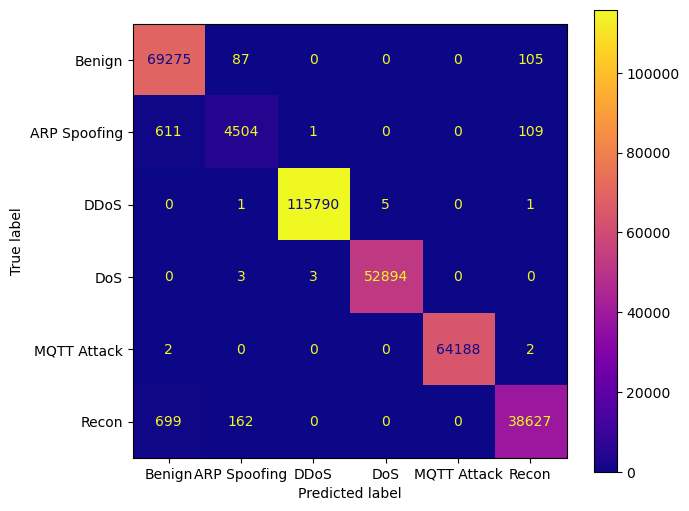

In [40]:
# Retrain model with new set of features
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, y, test_size=0.3, random_state=SEED)

new_rf = RandomForestClassifier(random_state=SEED)

new_rf.fit(new_X_train, new_y_train)  
new_model_pred = new_rf.predict(new_X_test)

print('Random Forest CLassifier with Reduced Set of Features')

accuracy = round(metrics.accuracy_score(new_y_test, new_model_pred), 3)
print(f'Accuracy: {accuracy}', '\n')

print(classification_report(new_y_test, new_model_pred, target_names=target_list))

cm = confusion_matrix(new_y_test, new_model_pred)
print(cm)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_list)
fig, ax = plt.subplots(figsize=(7, 6))
cm_display.plot(ax=ax,  cmap='plasma')
plt.show()

print("==" * 60)

In [41]:
### Save Model
filename = 'iomt_traffic_attack_detector.pkl'

# Write to file in binary format
pickle.dump(new_rf, open(filename, 'wb'))

In [42]:
# Compress the model
with open('iomt_traffic_attack_detector.pkl', 'rb') as file:
    model = pickle.load(file)

with gzip.open('compressed_iomt_traffic_attack_detector.pkl.gz', 'wb') as zipfile:
    pickle.dump(model, zipfile)

In [50]:
### Labels sample to test deployed model

# Sample one row for each label
samples_for_test = [iomt_dataset[iomt_dataset['Label'] == label].sample(n=1, random_state=SEED) for label in target_list]

# Concatenate all the samples into a new DataFrame
samples_for_test_df = pd.concat(samples_for_test).reset_index(drop=True)

# Display the new DataFrame
print(samples_for_test_df[list(new_features.columns) + ['Label']])

            IAT  rst_count  Header_Length  fin_count        AVG  Tot size  \
0  1.694668e+08    2753.90      207515.20       0.00  79.419584     76.30   
1  9.979758e-02     274.80       22555.50       0.00  89.841310     91.20   
2  8.469615e+07       0.00          54.00       0.00  54.000000     54.00   
3  8.467074e+07       0.00         108.00       0.00  54.000000     54.00   
4  8.466704e+07       3.66         340.02       0.22  69.462363     69.03   
5  6.840229e-05       1.00          65.60       1.00  55.009841     54.80   

           Rate  ack_count   Magnitue  ack_flag_number     Max  \
0      1.187829       0.00  12.608181             1.00  111.00   
1      0.324712       0.00  13.368481             0.90  174.00   
2  43464.290155       0.00  10.392305             0.00   54.00   
3      0.582192       0.00  10.392305             0.00   54.00   
4      7.993894       0.69  11.781297             0.54   75.17   
5      6.879866       0.00  10.488868             0.80   57.20  